# Importation

In [1]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# 2. Charger les données

In [2]:
dt = pd.read_csv('darknet.csv')
dt.head(10)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,32871,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:25,60320002,5,...,0,0,0,0,1.437590e+15,32799072.00,1.437590e+15,1.437590e+15,Non-Tor,Chat
1,32872,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:25,100709850,6,...,0,0,0,0,1.437590e+15,41488607.75,1.437590e+15,1.437590e+15,Non-Tor,Chat
2,32873,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:15,116498878,12,...,0,0,0,0,1.437590e+15,34540910.21,1.437590e+15,1.437590e+15,Non-Tor,Chat
3,32874,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:15,93296196,6,...,0,0,0,0,1.437590e+15,46647152.02,1.437590e+15,1.437590e+15,Non-Tor,Chat
4,32875,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:17,91832679,14,...,0,0,0,0,1.437590e+15,30675072.24,1.437590e+15,1.437590e+15,Non-Tor,Chat
5,32876,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:19,100362614,18,...,0,0,0,0,1.437590e+15,31972435.05,1.437590e+15,1.437590e+15,Non-Tor,Chat
6,32877,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:21,115555823,24,...,0,0,0,0,1.437590e+15,34805447.03,1.437590e+15,1.437590e+15,Non-Tor,Chat
7,32878,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,7/22/2015 14:17,83766756,6,...,0,0,0,0,1.437590e+15,38777560.58,1.437590e+15,1.437590e+15,Non-Tor,Chat
8,32879,5.9.28.6-10.152.152.11-5222-56297-6,5.9.28.6,5222,10.152.152.11,56297,6,7/22/2015 14:23,88178703,14,...,0,0,0,0,1.437590e+15,19492407.91,1.437590e+15,1.437590e+15,Non-Tor,Chat
9,32880,10.152.152.11-10.152.152.10-21588-53-17,10.152.152.11,21588,10.152.152.10,53,17,7/22/2015 13:55,561145,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Chat


# Analyse de donnee

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Flow ID                     22576 non-null  object 
 2   Src IP                      22576 non-null  object 
 3   Src Port                    22576 non-null  int64  
 4   Dst IP                      22576 non-null  object 
 5   Dst Port                    22576 non-null  int64  
 6   Protocol                    22576 non-null  int64  
 7   Timestamp                   22576 non-null  object 
 8   Flow Duration               22576 non-null  int64  
 9   Total Fwd Packet            22576 non-null  int64  
 10  Total Bwd packets           22576 non-null  int64  
 11  Total Length of Fwd Packet  22576 non-null  int64  
 12  Total Length of Bwd Packet  22576 non-null  int64  
 13  Fwd Packet Length Max       225

In [4]:
dt.shape

(22576, 86)

# Preparation de donnee

In [5]:
LabelEncoder = LabelEncoder()
# Encoder les colonnes catégorielles

In [6]:
dt['Flow ID'] = LabelEncoder.fit_transform(dt['Flow ID'])
dt['Src IP'] = LabelEncoder.fit_transform(dt['Src IP'])
dt['Timestamp'] = LabelEncoder.fit_transform(dt['Timestamp'])
dt['Dst IP'] = LabelEncoder.fit_transform(dt['Dst IP'])
dt['Label'] = LabelEncoder.fit_transform(dt['Label'])
dt['Label.1'] = LabelEncoder.fit_transform(dt['Label.1'])

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22576 entries, 0 to 22575
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  22576 non-null  int64  
 1   Flow ID                     22576 non-null  int64  
 2   Src IP                      22576 non-null  int64  
 3   Src Port                    22576 non-null  int64  
 4   Dst IP                      22576 non-null  int64  
 5   Dst Port                    22576 non-null  int64  
 6   Protocol                    22576 non-null  int64  
 7   Timestamp                   22576 non-null  int64  
 8   Flow Duration               22576 non-null  int64  
 9   Total Fwd Packet            22576 non-null  int64  
 10  Total Bwd packets           22576 non-null  int64  
 11  Total Length of Fwd Packet  22576 non-null  int64  
 12  Total Length of Bwd Packet  22576 non-null  int64  
 13  Fwd Packet Length Max       225

In [8]:
dt.tail(10)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
22566,139209,6739,11,53288,1266,57191,6,326,119535838,21,...,0,0,0,0,1.433520e+15,3.424016e+07,1.433520e+15,1.433520e+15,3,1
22567,139210,6738,11,49539,1266,57191,17,326,119903254,8,...,0,0,0,0,1.314060e+15,4.138200e+14,1.433520e+15,1.990476e+07,3,1
22568,139211,6920,11,49539,1474,23528,17,326,100161331,6,...,0,0,0,0,1.433520e+15,3.158436e+07,1.433520e+15,1.433520e+15,3,1
22569,139212,4167,11,52009,297,443,6,326,100353281,9,...,0,0,0,0,1.433520e+15,2.613504e+07,1.433520e+15,1.433520e+15,3,1
22570,139213,6919,11,48860,1474,23528,6,328,119989306,26,...,0,0,0,0,1.433520e+15,3.379670e+07,1.433520e+15,1.433520e+15,3,1
22571,139214,6720,11,52161,1174,40019,6,328,119786918,4,...,0,0,0,0,1.146810e+15,6.410880e+14,1.433520e+15,1.164131e+08,3,1
22572,139215,6739,11,53288,1266,57191,6,328,119546234,21,...,0,0,0,0,1.433520e+15,3.446273e+07,1.433520e+15,1.433520e+15,3,1
22573,139216,6738,11,49539,1266,57191,17,328,119749355,24,...,0,0,0,0,1.382320e+15,2.709090e+14,1.433520e+15,1.976405e+07,3,1
22574,139217,6920,11,49539,1474,23528,17,328,119992029,8,...,0,0,0,0,1.433520e+15,3.566404e+07,1.433520e+15,1.433520e+15,3,1
22575,139218,4167,11,52009,297,443,6,329,23,2,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,1


In [9]:
sub_data = dt[[ 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration','Label','Label.1' ]]

In [10]:
dt.isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Label.1       0
Length: 86, dtype: int64

In [11]:
print(sub_data.shape)
sub_data.head()

(22576, 10)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Label,Label.1
0,14445,563,5222,4,56297,6,472,60320002,0,0
1,14758,709,0,1458,0,0,472,100709850,0,0
2,14445,563,5222,4,56297,6,465,116498878,0,0
3,14758,709,0,1458,0,0,465,93296196,0,0
4,14445,563,5222,4,56297,6,466,91832679,0,0


<Axes: >

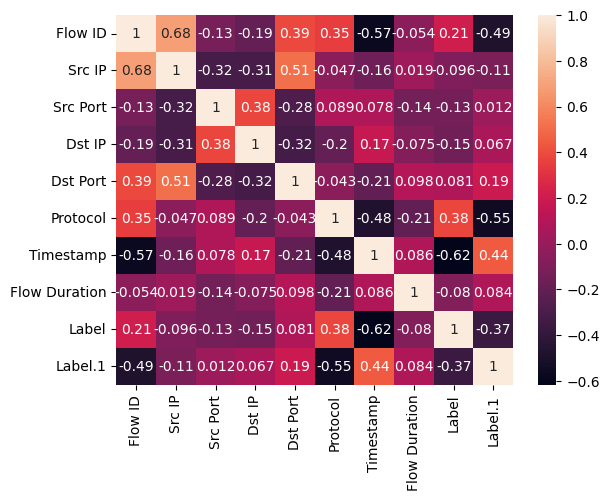

In [12]:
sns.heatmap(sub_data.corr(), annot=True)

In [13]:
sub_data['Label.1'].value_counts()

Label.1
0    11478
1    11098
Name: count, dtype: int64

# 5. Diviser les donnees : Train et Test

In [14]:
# Diviser les donnees : Train et Test
X = sub_data.iloc[ : , :-1]
y = sub_data.iloc[ : , -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Convert y_train to categorical
y_train_categorical = to_categorical(y_train, num_classes=6)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [16]:
print("X-train Shape:", X_train.shape)
print("y-train Shape:", y_train.shape)
print("X-test Shape:", X_test.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (15803, 9)
y-train Shape: (15803,)
X-test Shape: (6773, 9)
y-test Shape: (6773,)


In [17]:
X_train

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Label
3209,9880,100,137,197,137,17,266,1500808,1
10656,5452,11,42983,646,53,17,160,126336,3
16033,2957,10,43330,1388,1705,6,425,1698453,0
13997,469,10,40426,3,53,17,487,281503,0
21979,14841,776,443,6,56890,6,306,160993,3
...,...,...,...,...,...,...,...,...,...
19391,12021,126,4511,190,50614,6,7,119995863,1
15393,14256,461,80,4,35254,6,494,6,0
9143,8809,14,55740,646,53,17,173,134628,3
17679,3341,10,50504,1388,1585,6,434,413,0


In [18]:
X_test

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Label
10586,5144,11,34197,646,53,17,164,124878,3
7195,14385,520,443,9,36953,6,109,144,3
3164,11808,118,62571,828,5355,17,251,409991,1
14227,4001,10,49227,1566,80,6,497,90174192,0
18274,9650,98,22050,200,53,17,64,406,1
...,...,...,...,...,...,...,...,...,...
6635,11890,122,56117,828,5355,17,254,410036,1
18956,13638,173,13111,195,38045,6,226,41,1
7703,8431,14,42079,646,53,17,105,129948,3
8323,4527,11,17743,646,53,17,100,123949,3


In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[ 0.52667657,  0.13875792, -1.97835812, ..., -0.09024578,
        -0.46481195, -0.25881076],
       [-0.46792487, -0.54410848,  0.15819474, ..., -0.81301194,
        -0.50273739,  1.39037733],
       [-1.02834279, -0.55178114,  0.17549819, ...,  0.99390346,
        -0.45935839, -1.08340481],
       ...,
       [ 0.2861124 , -0.52109051,  0.79433358, ..., -0.7243708 ,
        -0.50250859,  1.39037733],
       [-0.9420901 , -0.55178114,  0.53323591, ...,  1.0552704 ,
        -0.50621195, -1.08340481],
       [ 1.07069751,  0.33824698,  0.47888212, ..., -0.10388287,
        -0.49456503, -0.25881076]])

In [21]:
y_train

3209     0
10656    0
16033    1
13997    1
21979    1
        ..
19391    1
15393    1
9143     0
17679    1
5833     0
Name: Label.1, Length: 15803, dtype: int64

# 6. Construire le Shallow Neural Network

In [22]:
print(sub_data.isnull().sum())
print(np.isinf(sub_data).sum())

Flow ID          0
Src IP           0
Src Port         0
Dst IP           0
Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Label            0
Label.1          0
dtype: int64
Flow ID          0
Src IP           0
Src Port         0
Dst IP           0
Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Label            0
Label.1          0
dtype: int64


In [23]:
# Creer une instance de la Classe Sequential
model = Sequential()

In [24]:
# En supposant que X_train a 9 caractéristiques
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu')) 

# Ajoutez une couche de sortie avec 6 neurones et une activation softmax pour la classification multi-classes
model.add(Dense(6, activation='sigmoid'))  

# Compilez le modèle avec l'optimiseur Adam, la perte d'entropie croisée catégorique et l'exactitude comme métrique
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data with validation split
history = model.fit(X_train, y_train_categorical, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6714 - loss: 0.9160 - val_accuracy: 0.8931 - val_loss: 0.3298
Epoch 2/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.9110 - loss: 0.2704 - val_accuracy: 0.9386 - val_loss: 0.2281
Epoch 3/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9432 - loss: 0.1998 - val_accuracy: 0.9484 - val_loss: 0.1863
Epoch 4/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9520 - loss: 0.1777 - val_accuracy: 0.9544 - val_loss: 0.1631
Epoch 5/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.9591 - loss: 0.1456 - val_accuracy: 0.9624 - val_loss: 0.1521
Epoch 6/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9629 - loss: 0.1382 - val_accuracy: 0.9649 - val_loss: 0.1419
Epoch 7/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1356 - val_accuracy: 0.9646 - val_loss: 0.1338
Epoch 8/100
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - los

In [25]:
y_test_categorical = to_categorical(y_test, num_classes=6)

In [26]:
loss, accuracy = model.evaluate(X_test, y_test_categorical)

212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.9830 - loss: 0.0538


In [27]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

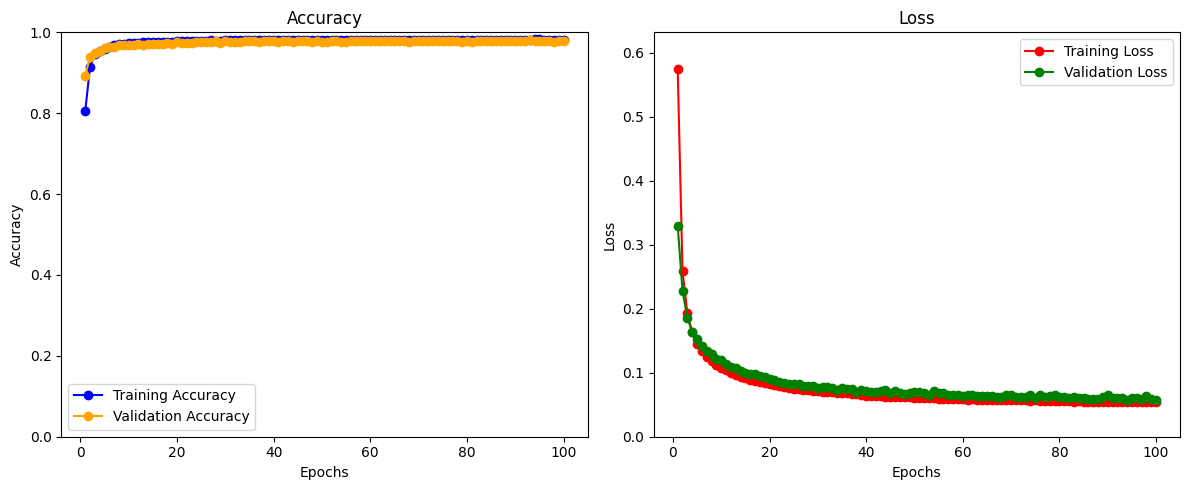

In [28]:
import matplotlib.pyplot as plt

# Tracer l'exactitude et la perte d'entraînement et de validation
plt.figure(figsize=(12, 5))

# Exactitude
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, color='blue', marker='o', label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, color='orange', marker='o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.ylim(0, 1)  # Limiter l'axe Y entre 0 et 1 pour l'exactitude
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, color='red', marker='o', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, color='green', marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.ylim(0, max(max(train_loss), max(val_loss)) * 1.1)  # Ajuster l'axe Y pour la perte
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

# 8. Evaluer le modèle

In [29]:
# Supposons que 'model' est votre modèle entraîné et 'X_test' est votre ensemble de test
y_pred = model.predict(X_test)
# Afficher les prédictions
print(y_pred)

212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
[[9.99792695e-01 1.06233791e-01 1.64071491e-12 3.59892628e-12
  4.51254962e-12 3.68081650e-12]
 [9.99993861e-01 1.82409026e-02 2.45703387e-14 9.01937708e-15
  2.36758025e-14 2.25525165e-14]
 [9.90829170e-01 1.40546113e-01 2.69507439e-09 1.89418281e-09
  2.02124495e-09 4.20984092e-09]
 ...
 [9.99988794e-01 2.95532588e-02 1.86376061e-16 2.39422095e-16
  2.16163735e-16 5.92663606e-16]
 [9.99996662e-01 2.87128016e-02 1.56740945e-16 2.85411828e-16
  2.97982697e-16 7.34750895e-16]
 [9.98968244e-01 1.22049086e-01 3.47544638e-13 5.10788785e-13
  8.80448817e-13 7.68859965e-13]]


In [30]:
# Convert probabilities to discrete class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculer et afficher les métriques
accuracy = metrics.accuracy_score(y_test, y_pred_classes)
print('Accuracy:', accuracy)

# Rapport de classification
print(metrics.classification_report(y_test, y_pred_classes))

Accuracy: 0.9825778827698214
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3481
           1       0.97      0.99      0.98      3292

    accuracy                           0.98      6773
   macro avg       0.98      0.98      0.98      6773
weighted avg       0.98      0.98      0.98      6773



# 6. Selection au moins 5 Algorithms de Machine Learning

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [32]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_predict = lr_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print("ACCURANCY DE LA REGRESSION LOGISTIQUE :", 100 * accuracy_score(y_test, y_predict))
print("MSE REGRESSION LOGISTIQUE:", mean_squared_error(y_test, y_predict))

ACCURANCY DE LA REGRESSION LOGISTIQUE : 88.23268861656578
MSE REGRESSION LOGISTIQUE: 0.11767311383434224


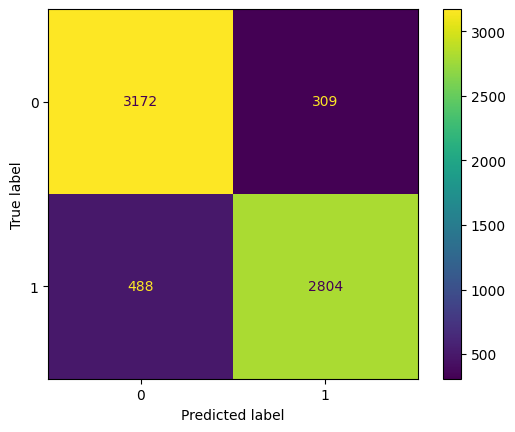

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)

In [36]:
model_dr = RandomForestClassifier(n_estimators=150 , criterion='entropy', random_state=150)

In [37]:
model_dr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=150)

In [38]:
predict_dr = model_dr.predict(X_test)
predict_dr

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
print("ACCURANCY  RANDOM :", 100 * accuracy_score(y_test,predict_dr))
print ("MSE DE RANDOM:",mean_squared_error(y_test,predict_dr))

ACCURANCY  RANDOM : 99.88188395098184
MSE DE RANDOM: 0.0011811604901816035


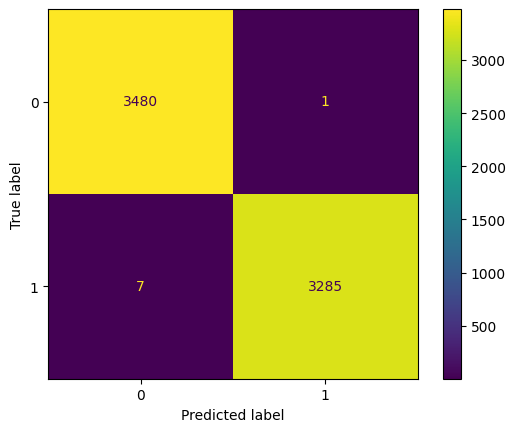

In [40]:
# Display the confusion matrix 
ConfusionMatrixDisplay.from_estimator(model_dr, X_test, y_test)
# Afficher la matrice de confusion  
plt.show()
# Afficher la matrice de confusion


In [41]:
KNN_model = KNeighborsClassifier(n_neighbors=150)

In [42]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=150)

In [43]:
knn_predict = KNN_model.predict(X_test)

In [44]:
print("ACCURANCY    KNN :", 100 * accuracy_score(y_test,knn_predict))
print ("MSE DE KNN :",mean_squared_error(y_test,knn_predict))

ACCURANCY    KNN : 92.1157537280378
MSE DE KNN : 0.07884246271962203


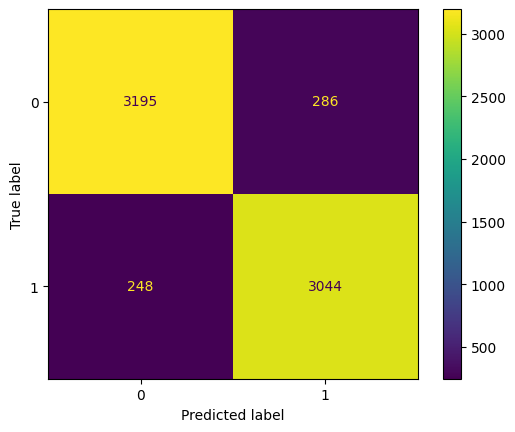

In [45]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)
plt.show()

In [46]:

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Entraînement
gbc.fit(X_train, y_train)

# Prédiction
predictions = gbc.predict(X_test)

In [47]:
print("ACCURANCY  GRADIENT BOOSTING :", 100 * accuracy_score(y_test,predictions))
print ("MSE DE GRADIENT BOOSTING:",mean_squared_error(y_test,predictions))

ACCURANCY  GRADIENT BOOSTING : 99.91141296323637
MSE DE GRADIENT BOOSTING: 0.0008858703676362026


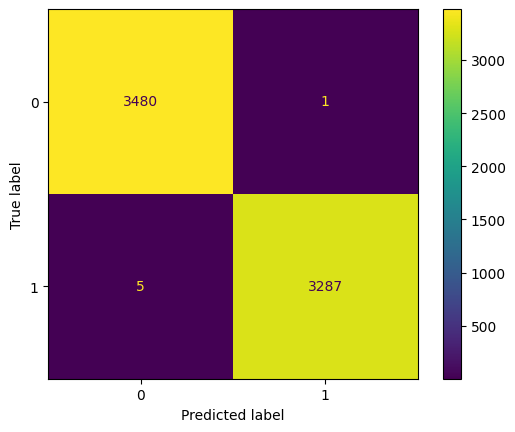

In [48]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)
plt.show()

In [49]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
svm_predict = svm_model.predict(X_test)
print("ACCURANCY SVM :", 100 * accuracy_score(y_test,svm_predict))
print ("MSE DE SVM :",mean_squared_error(y_test,svm_predict))

ACCURANCY SVM : 86.68241547320243
MSE DE SVM : 0.1331758452679758
